### Lab 4 - Regression using linear models

The purpose of this lab is to learn and implement various Linear regression models. The models will predict the fatigue of steel given various process parameters. The data is stored in the csv file provided and cell below read it in a Pandas dataframe.

The lab is worth 30 marks plus additional 2 marks for bonus questions. Instructions for each part is provided in the corresponding cells. Please contact the TA if any instruction is not clear.

#### Packages required

<ol>
    <li> Numpy </li>
    <li> Matplotlib </li>
    <li> Pandas </li>
    <li> SKLearn </li>

</ol>

### Loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data here 
data_file = "40192_2013_16_MOESM1_ESM.csv"
df_loaded = pd.read_csv(data_file)

Its always good idea to explore the data that is given to us. The dataset includes chemical compositions and various process parameters. Using these as inputs, we will try to predict fatigue in the steel samples. More details can be found at A.Agrawal et.al. (2014), "Exploration of data science techniques to predict fatigue strength of steel from composition and processing parameters", IMMI

Ques 4.1 (1.5 points) Get the mean, minimum and maximum of each column of the pandas data frame 'df_loaded'.

In [3]:
# Enter your code here.

df_loaded.describe()  #use built in functions from Pandas package

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,126.295289,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,1.000000,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,110.000000,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,219.000000,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,328.000000,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,437.000000,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


Another useful function is to find unique element in a data frame.

Ques 4.2 (0.5 point) Print the unique elements in the column labeled 'THT'

In [4]:
# Enter your code here

df_loaded.THT.unique()

array([ 30, 865, 845, 825, 855], dtype=int64)

In the cell below, we are seperating inputs and output (fatigue) from the dataframe. Run the cell before before you move forward. 

In [5]:
X = df_loaded.drop(['Fatigue'],axis=1)
Y = df_loaded['Fatigue']

Each feature (columns of X) is having different distribution i.e. different mean, minimum and maximum. Before applying any machine learning algorithm, its important to normalize each features. Like the last lab, we will compute mean and standard deviation of each feature. 

Ques 4.3 (3 points) Preprocess the features to have unit normal distribution.

In [40]:
test = (X.values - X.values.mean(axis = 0))/(X.values.std(axis = 0))


#make sure that the data columns have a mean of 0 and unit variance
print(test.var(axis=0), test.mean(axis = 0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] [ 0.00000000e+00 -2.04870446e-15 -2.11374269e-16  8.12977959e-17
  0.00000000e+00 -1.30076473e-16 -9.75573550e-17  0.00000000e+00
  0.00000000e+00  9.75573550e-17 -9.75573550e-17  6.50382367e-17
 -1.78855151e-16 -5.52825012e-16  1.13816914e-16 -2.60152947e-16
  1.78855151e-16  1.62595592e-16 -3.25191183e-17  1.05687135e-16
 -3.08931624e-16  9.75573550e-17  6.50382367e-17 -9.75573550e-17
 -1.62595592e-17 -3.65840081e-17]


Ques 4.4 (1 point) Split the data into training and test set. Retain 80% of the data as training set and rest 20% as test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test, Y, test_size = 0.2)

Ques 4.5 (2 points) Fit a linear regression model on the training set. Use SKlearn's Linear regression model

In [19]:
# load dependencies
from sklearn.linear_model import LinearRegression

#define model
reg = LinearRegression()

#Fit the data to the model
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ques 4.6 (2 points) Compute predictions on training set. Print the mean absolute error between predictions and true values

In [28]:
y_train_pred = reg.predict(X_train)

from sklearn.metrics import mean_absolute_error

print('Mean absolute error base on training dataset is : %0.2f' %mean_absolute_error(y_train, y_train_pred))


Mean absolute error base on training dataset is : 19.926


Ques 4.7 (2 points) Compute predictions on test set and report mean absolute error on test set.

In [29]:
y_test_pred = reg.predict(X_test)

from sklearn.metrics import mean_absolute_error

print('Mean absolute error base on training dataset is : %0.2f' %mean_absolute_error(y_test, y_test_pred))


Mean absolute error base on training dataset is : 33.43


Ques 4.8 (1 point) Plot the test set predictions versus corresponding true values

Text(0, 0.5, 'Y Predicted Values')

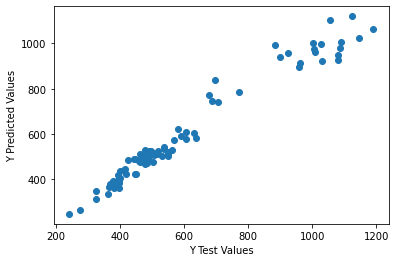

In [31]:
fig, ax = plt.subplots(1,1)

plt.scatter(y_test, y_test_pred)

plt.xlabel('Y Test Values')
plt.ylabel('Y Predicted Values')

Ques 4.9 ( 1 point) Compute r-squared value for the test set predictions. Hint: - google sklearn's score method

In [32]:
from sklearn.metrics import r2_score

print('R^2 is : %0.2f' % r2_score(y_test, y_test_pred))

R^2 is : 0.96


### Polynomial regression

In this section we will perform polynomial regression and compare the performance with corresponding Linear regression

Ques 4.10 (1 point) Obtain polynomial features on original X. It is important that we use original X and not the normalized X, to get polynomial features.

Hint - Use PolynomialFeatures from sklearn.preprocessing. It will be efficient to use fit_transfom method

In [58]:
from sklearn.preprocessing import PolynomialFeatures

#define the model
polyFeatures = PolynomialFeatures(2)

#fit the X data and assign to and array 
polyFeatures = polyFeatures.fit_transform(X)

Ques 4.11 (3 points) Normalize your features in the same manner as in Ques 4.3. 

In [61]:
meanX = polyFeatures.mean(axis = 0)
stdX = polyFeatures.std(axis = 0)

X_p_norm = (polyFeatures - meanX)/stdX

#check that the array has the correct properties
#print(X_p_norm.var(axis = 0), X_p_norm.mean(axis = 0))

C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [62]:
# We will remove the columns where standard deviation is zero. 
# As standard deviation is zero, which means the entire column has single value 
# Our algorithm will add the corresponding weight to the constant term
# you don't have to enter any code in this cell. Just run the cell one time and it will delete the corresponding columns

indDelete = np.where(stdX==0)[0]
polyFeatures = np.delete(polyFeatures, indDelete, axis=1)
meanX = np.delete(meanX,indDelete,axis=0)
stdX = np.delete(stdX,indDelete,axis=0)

In [64]:
normalizedX = (polyFeatures - meanX)/stdX

#check the variance and mean
print(normalizedX.mean(axis = 0), normalizedX.var(axis =0))

#no rows with nan are present

[ 0.00000000e+00 -1.88610886e-15 -9.75573550e-17  1.62595592e-17
  1.30076473e-16  3.25191183e-17  0.00000000e+00  2.92672065e-16
  0.00000000e+00  3.25191183e-17 -1.13816914e-16  1.30076473e-16
 -1.62595592e-16  1.20320738e-15 -9.91833109e-16 -1.52839856e-15
  4.84534863e-15  5.56076924e-15  0.00000000e+00 -5.28435673e-16
  2.60152947e-16 -4.22748538e-16  6.50382367e-17  5.26809717e-15
 -1.95114710e-16  2.79257929e-15  6.50382367e-17  0.00000000e+00
 -6.50382367e-17  0.00000000e+00 -3.25191183e-17  6.50382367e-17
 -6.50382367e-17  6.50382367e-17 -3.25191183e-17 -3.25191183e-17
  0.00000000e+00  0.00000000e+00  1.30076473e-16  0.00000000e+00
  1.95114710e-16 -7.15420604e-16  1.04061179e-15  6.50382367e-16
 -1.95114710e-16  6.50382367e-17 -6.50382367e-16  3.57710302e-16
 -6.50382367e-17 -7.80458840e-16  6.50382367e-17  2.27633828e-16
  9.10535314e-16  1.78855151e-16 -3.25191183e-17  0.00000000e+00
  6.50382367e-17  0.00000000e+00  7.47939722e-16  0.00000000e+00
  6.50382367e-17 -1.30076

After obtaining polynomial features and standardizing the data we will split the data into training and test set and apply linear regression model to it.

Ques 4.12 (2 points) Perform train-test split of normalized data and fit a linear regression model on top of it

In [66]:
X_train, X_test, y_train, y_test = train_test_split(normalizedX, Y, test_size = 0.2)
reg = LinearRegression().fit(X_train, y_train)

Ques 4.13 (2 points) Get the prediction on training set and compute mean absolute error

In [67]:
y_train_predict = reg.predict(X_train)

print('Mean absolute error on train data is: %0.2f' % mean_absolute_error(y_train, y_train_predict))

Mean absolute error on train data is: 4.47


Ques 4.14 (2 points) Get the prediction on test set and compute mean absolute error

In [68]:
y_test_predict = reg.predict(X_test)

print('Mean absolute error on test data is: %0.2f' % mean_absolute_error(y_test, y_test_predict))

Mean absolute error on test data is: 144.62


Ques 4.15 (1 point) Plot the test set predictions versus corresponding true values

Text(0, 0.5, 'Predicted Y Value')

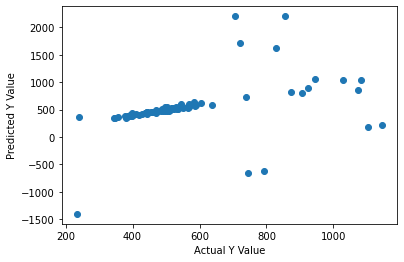

In [71]:
fig, ax = plt.subplots(1,1)

plt.scatter(y_test, y_test_predict)

plt.xlabel('Actual Y Value')
plt.ylabel('Predicted Y Value')

The above plot shows a classical case of overfitting. There are many possible reasons for this overfitting. A very simple reason can be less amount of training data as comapred to number of features present. Nevertheless, to prevent the overfitting, we use a technique called ridge regression. Under this technique we penalize the magnitude of weights that our model can have. This restricts the values of the coefficients and thus favouring simple models as compared to complex one. 

The loss function that we minimize is 

$||Y - w^TX||^2 +\alpha\sum_iw_i^2 $,

where $\alpha$ controls the model complexity. When $\alpha$ equals 0, the above model corresponds to linear regression model.

Under SKLearn, fitting a ridge regression model is very similar to the Linear regression model. We will use Ridge class under linear_model.


Ques 4.16 (2 points) Create a ridge regression model for $\alpha$ equals 0.1 and fit on the training set of Ques 4.12

In [73]:
#load dependecies
from sklearn.linear_model import Ridge

#define the model
ridge_reg = Ridge(alpha = 0.1)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ques 4.17 (2 points) Get the prediction on training set and compute mean absolute error

In [80]:
y_train_predict = ridge_reg.predict(X_train)

print('Mean absolute error on train data is: %0.2f' % mean_absolute_error(y_train, y_train_predict))

Mean absolute error on train data is: 19.11


Ques 4.18 (1 point) Get the prediction on test set and compute mean absolute error

In [81]:
y_test_predict = ridge_reg.predict(X_test)

print('Mean absolute error on test data is: %0.2f' % mean_absolute_error(y_test, y_test_predict))

Mean absolute error on test data is: 25.38


Our prediction on test set has considerably improved by using polynomial features and ridge regression. 

###  Bonus Question ( 2 points)

Try the fitting for 5 different $\alpha$ values and report the best performing model i.e. $\alpha$ for which mean absolute error on test set is minimum. Also report the corresponding mean absolute error.

In [86]:
#make a list of geometically spaced alphas
alpha_values = np.geomspace(0.01, 100, num =5)

for values in alpha_values:
    #define model
    ridge_reg = Ridge(alpha = values)
    #fit data
    ridge_reg.fit(X_train, y_train)
    
    #find predicted y-test values
    y_test_predict = ridge_reg.predict(X_test)
    
    # print the resulting mean absolute error
    print('MA for an alpha of ' + str(values) + ' is: %0.2f' % mean_absolute_error(y_test, y_test_predict))

MA for an alpha of 0.01 is: 23.78
MA for an alpha of 0.1 is: 21.55
MA for an alpha of 1.0 is: 20.17
MA for an alpha of 10.0 is: 17.84
MA for an alpha of 100.0 is: 25.38


### IJ Comments

An $\alpha$ of approximately 9 (calculations not fully shown) gives the best mean absolute error on the data set

#### A comment on overfitting. 

As you have noticed, we were working on a very limited dataset (437 material samples) and this limits the kind of models that we can fit on this data. When we generated polynomial features, we had about 373 columns. To get the most out of these 373 columns, we definately need more training samples. But in the situations when obtaining more data is not possible, you definately want to have maximum use of all the data available. In these situations, we employ a very popular method called cross-validation. Instead of splitting data into dedicated training and test, we divide the data into k folds or partitions.The k can be 2,3,4,5 depending on the computational resources avaialble. We train our model on all the partitions except one and measure the accuracy over left out set. We repeat this procedure for all the partitions and select the model based on avaerage performance.

### Sparse models

Sparse modeling refers to the set of models that result in most of the weights to be zero. Under these models, we can drop or delete the features where weights are zero resulting in compact input matrix. This method can also help in the situations with small data sets and a useful tool in feature selection. We only retain the features corresponding to non-zero weights.

One way to achieve sparsity is through minimizing the following loss function

$||Y - w^TX||^2 +\alpha\sum_i|w_i| $,

where $\alpha$ controls the model sparsity or the number of non zero weights. To fit this model, we can use SKLearn's Lasso library. Another efficient library for sparse models is glmnet.

In [87]:
#Code demonstration for fitting a sparse model 
from sklearn import linear_model
sparseModel = linear_model.Lasso(alpha=0.1)
sparseModel.fit(X_train,y_train)
print("Coeffiecients ", sparseModel.coef_)

#you can see most of the coefficients are zero 

Coeffiecients  [ 3.76342384e+01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.01546332e+01  1.57067153e+01  2.09192206e+00
  0.00000000e+00  0.00000000e+00 -2.12807013e+01  1.54185672e+01
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.09534272e+01  2.71987666e+01
  0.00000000e+00  0.00000000e+00 -1.36196397e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.62237668e+01
  0.00000000e+00  0.00000000e+00  1.17436729e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.15189772e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.22723907e+00  3.24950881e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.45086172e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.000000

C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22700.516066385473, tolerance: 1198.3236567335246
  positive)
